# Datacamp Nobel Prize analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing the data
data = pd.read_csv('data/nobel.csv')

# Exploring the data
print(f'Data columns: {data.columns} \n\n')
print(f'Data basic information: {data.info()}\n\n')
print(f'Data sample rows: {data.head(3)}')

Data columns: Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object') 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth

In [5]:
# Fixing the categories
# data['year'] = data['year'].astype('category')
data['category'] = data['category'].astype('category')
data['prize_share'] = data['prize_share'].astype('category')
data['laureate_type'] = data['laureate_type'].astype('category')
data['sex'] = data['sex'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   year                  1000 non-null   int64   
 1   category              1000 non-null   category
 2   prize                 1000 non-null   object  
 3   motivation            912 non-null    object  
 4   prize_share           1000 non-null   category
 5   laureate_id           1000 non-null   int64   
 6   laureate_type         1000 non-null   category
 7   full_name             1000 non-null   object  
 8   birth_date            968 non-null    object  
 9   birth_city            964 non-null    object  
 10  birth_country         969 non-null    object  
 11  sex                   970 non-null    category
 12  organization_name     736 non-null    object  
 13  organization_city     735 non-null    object  
 14  organization_country  735 non-null    object  
 15  death

In [7]:
# Question 1

top_gender = data.groupby('sex')['laureate_id'].agg('count').sort_values(ascending=False).index[0]
print(top_gender)

top_country = data.groupby('birth_country')['laureate_id'].agg('count').sort_values(ascending=False).index[0]
print(top_country)

Male
United States of America


/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


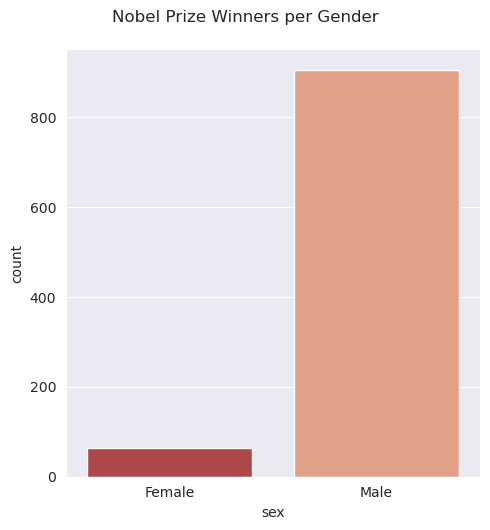

In [81]:
# Plotting question 1
sns.set_palette('RdBu')
g = sns.catplot(data=data, x='sex', kind='count')
g.fig.suptitle('Nobel Prize Winners per Gender', y = 1.05)
plt.show()

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


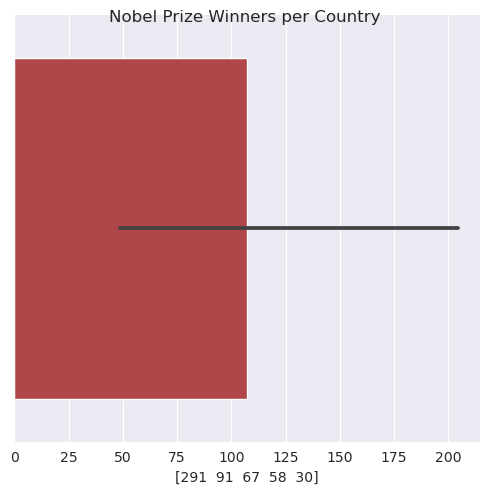

In [87]:
per_country = data.groupby('birth_country')['prize'].count().sort_values(ascending=False).head(5)
# print(per_country)
h = sns.catplot(data=per_country, x=per_country.values, kind='bar')
h.fig.suptitle('Nobel Prize Winners per Country')
plt.show()

In [8]:
# Question 2
# Finding the decade with the highest number of USA awards

data['decade'] = (data.year/10).astype(int)*10
usa = data[data.birth_country == 'United States of America']
max_decade_usa = data.groupby('decade')['laureate_id'].agg('count').sort_values(ascending=False).index[0]
print(max_decade_usa)

2000


In [13]:
# Question 3
# Decade with  the highest female proportion

sex_decade = data.pivot_table(index=['decade', 'category'], values='laureate_id', columns='sex', aggfunc='mean', fill_value=0)
answer = sex_decade[sex_decade.Female == sex_decade.Female.max()].index[0]
max_female_dict = {answer[0]: answer[1]}
print(max_female_dict)

{2020: 'Economics'}


In [12]:
nobel = data.__deepcopy__()
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}
print(max_female_dict)

{2020: 'Literature'}


In [14]:
# Question 4
# First female to win a Nobel Prize

only_female = data[data.sex == 'Female'][['year', 'category', 'full_name', 'sex']].sort_values(by='year', ascending=True)
print(only_female)
first_woman_name = only_female.full_name.iloc[0]
first_woman_category = only_female.category.iloc[0]


     year    category                                          full_name  \
19   1903     Physics                        Marie Curie, née Sklodowska   
29   1905       Peace  Baroness Bertha Sophie Felicita von Suttner, n...   
51   1909  Literature                      Selma Ottilia Lovisa Lagerlöf   
62   1911   Chemistry                        Marie Curie, née Sklodowska   
128  1926  Literature                                     Grazia Deledda   
..    ...         ...                                                ...   
982  2022  Literature                                       Annie Ernaux   
993  2023     Physics                                    Anne L’Huillier   
998  2023       Peace                                   Narges Mohammadi   
989  2023    Medicine                                     Katalin Karikó   
999  2023   Economics                                     Claudia Goldin   

        sex  
19   Female  
29   Female  
51   Female  
62   Female  
128  Female  
.. 

In [52]:
# Question 5
# Which individuals or organizations have won more than one Nobel Prize throughout the years?

count_nobel = data.groupby('laureate_id', as_index=False)['full_name'].count()
filtered = count_nobel[count_nobel.full_name >= 2]
print(filtered)

repeat_list = list(data[data.laureate_id.isin(filtered.laureate_id)].full_name.drop_duplicates())

     laureate_id  full_name
5              6          2
64            66          2
212          217          2
217          222          2
475          482          3
507          515          2
720          743          2


In [50]:
data[data.laureate_id == 743].full_name

721    K. Barry Sharpless
975       Barry Sharpless
Name: full_name, dtype: object